# Artificial Neural Networks: Primer

In [1]:
# import packages 
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling

import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
#| label: loaddata
# Data 
df = pd.read_csv("/Users/mauropazmino/Documents/Learning/Deep_learning_tensor/data/MIRS_temperature_vs_age_20241014.dat", sep="\t")

df

,Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Cat7,Cat8,Cat9,Cat10,...,420,418,416,414,412,410,408,406,404,402
0,AC,S,0,YY,SU,T1,C1,R1,190823,111223,...,0.2321,0.2309,0.2283,0.2274,0.2275,0.2286,0.2305,0.2316,0.2323,0.2336
1,AC,S,0,YY,SU,T1,C1,R1,190823,111223,...,0.2223,0.2198,0.2187,0.2192,0.2195,0.2192,0.2194,0.2211,0.2225,0.2222
2,AC,S,0,YY,SU,T1,C1,R1,190823,111223,...,0.2040,0.2028,0.2019,0.2022,0.2037,0.2048,0.2054,0.2056,0.2047,0.2036
3,AC,S,0,YY,SU,T1,C1,R1,190823,111223,...,0.2409,0.2389,0.2364,0.2353,0.2360,0.2368,0.2372,0.2380,0.2390,0.2398
4,AC,S,0,YY,SU,T1,C1,R1,190823,111223,...,0.2150,0.2155,0.2152,0.2150,0.2154,0.2154,0.2156,0.2165,0.2181,0.2191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4539,AG,S,31,YY,SU,T1,K2,R4,190923,30124,...,0.1638,0.1634,0.1618,0.1608,0.1606,0.1607,0.1617,0.1625,0.1623,0.1616
4540,AG,S,31,YY,SU,T1,K2,R4,190923,30124,...,0.2457,0.2438,0.2424,0.2420,0.2425,0.2440,0.2457,0.2465,0.2461,0.2443
4541,AG,S,31,YY,SU,T1,K2,R4,190923,30124,...,0.2676,0.2667,0.2678,0.2682,0.2674,0.2683,0.2712,0.2717,0.2695,0.2685
4542,AG,S,31,YY,SU,T1,K2,R4,190923,30124,...,0.2725,0.2718,0.2681,0.2659,0.2661,0.2681,0.2708,0.2727,0.2736,0.2741


<Axes: xlabel='Cat1'>

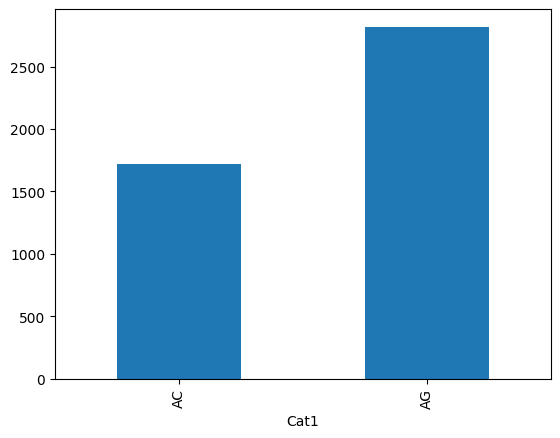

In [ ]:
#| label: classes
df.groupby(['Cat1'])['Cat2'].count().plot.bar()

In [4]:
# Extract features and labels
X = np.asarray(df.iloc[:, 15:-1])
y = np.asarray(df.iloc[:,0])

In [ ]:
#|label: resampling
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)

X_resampled, y_resampled = rus.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[('AC', 1724), ('AG', 1724)]


In [6]:
# Change the labels into 0 or 1
lb = LabelBinarizer()
y_binary = lb.fit_transform(y_resampled)

In [7]:
# Split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_binary, stratify=y_binary, shuffle=True, test_size=0.2)

In [8]:
# Scaling train and test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Split it further train set into train and validation
X_train_2, X_val, y_train_2, y_val = train_test_split(X_train, y_train, stratify=y_train, shuffle=True, test_size=0.2)

In [10]:
# functions to eliminate part of the messages when training ANN
def get_callbacks(name):
  return [
    tfdocs.modeling.EpochDots()
  ]

In [11]:
# define the keras model
input_shape = [1796,]
model = keras.Sequential()
model.add(keras.layers.Input(shape=input_shape))
model.add(keras.layers.Dense(500, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [12]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#| label: summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 500)            │       898,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 899,001 (3.43 MB)

 Trainable params: 899,001 (3.43 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#| label: fit
history = model.fit(x=X_train_2, y=y_train_2, epochs=500, batch_size=250, validation_data=[X_val, y_val],verbose=0,callbacks=get_callbacks('model_baseline'))


Epoch: 0, accuracy:0.6011,  loss:1.5072,  val_accuracy:0.6159,  val_loss:0.9330,  
....................................................................................................
Epoch: 100, accuracy:0.9402,  loss:0.1599,  val_accuracy:0.8424,  val_loss:0.4303,  
....................................................................................................
Epoch: 200, accuracy:0.9465,  loss:0.1408,  val_accuracy:0.8351,  val_loss:0.5025,  
....................................................................................................
Epoch: 300, accuracy:0.9986,  loss:0.0207,  val_accuracy:0.8696,  val_loss:0.5299,  
....................................................................................................
Epoch: 400, accuracy:0.9995,  loss:0.0109,  val_accuracy:0.8750,  val_loss:0.5526,  
....................................................................................................

(0.0, 1.5)

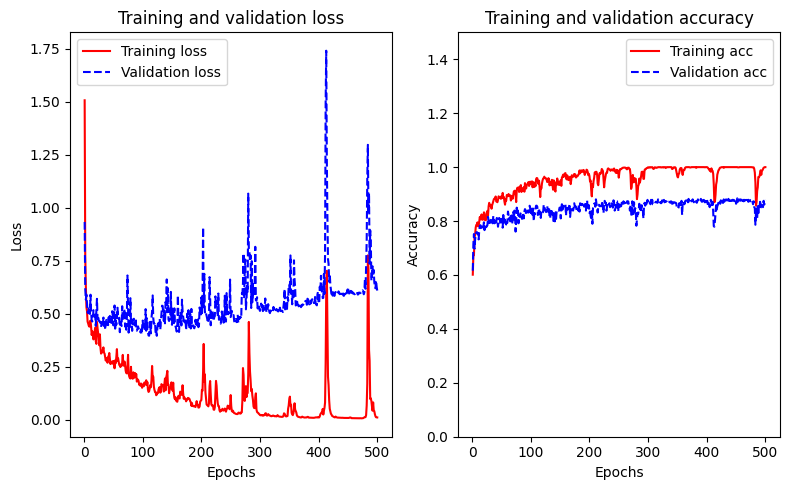

In [ ]:
#| label: validationcurves
# Check training and validation curves
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(8,5), tight_layout=True)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
ax.plot(epochs, loss, 'r-', label='Training loss')
ax.plot(epochs, val_loss, 'b--', label='Validation loss')
ax.set_title('Training and validation loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
ax2.plot(epochs, acc, 'r-', label='Training acc')
ax2.plot(epochs, val_acc, 'b--', label='Validation acc')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')

ax.legend()
ax2.legend()
ax2.set_ylim(0,1.5)

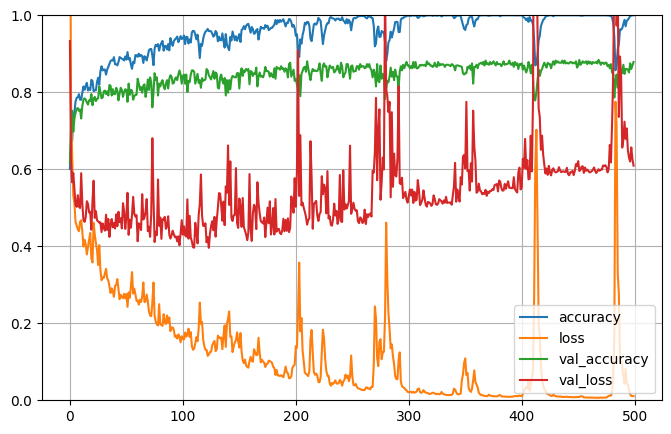

In [16]:
# Another way of plotting learning curves

pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
#| label: evaluation
# model evaluation
model.evaluate(X_test, y_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8840 - loss: 0.4466


[0.4332384169101715, 0.8927536010742188]

In [ ]:
#| label: predictions
# Make predictions
y_proba = model.predict(X_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
#| label: predictions2
# Predictions will be a probability in the range between 0 and 1. So, we round them to have binary predictions

y_predicted = y_proba.round(0).astype(int)
y_predicted[0:5]

array([[1],
       [1],
       [1],
       [1],
       [0]])

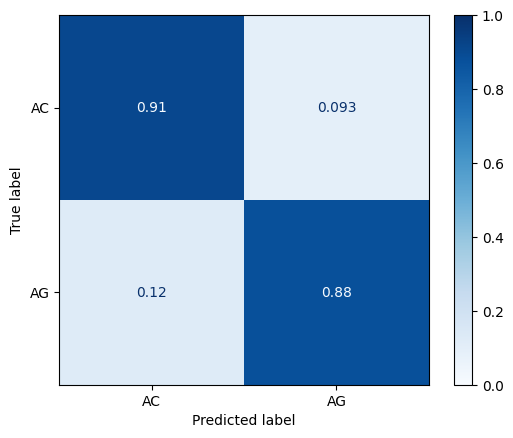

In [ ]:
#| label: finalcm
# Confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_pred=lb.inverse_transform(y_predicted), y_true=lb.inverse_transform(y_test), normalize='true', cmap='Blues',im_kw={'vmin':0, 'vmax':1})

In [ ]:
#|label: savemodel
# save your model
model.save("./models/my_first_keras_model.keras")

In [ ]:
#|label: loadmodel
# load your model
model_new = keras.models.load_model("./models/my_first_keras_model.keras")


/Users/mauropazmino/Documents/Learning/Deep_learning_tensor/.venv/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [36]:
model_new.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 500)            │       898,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,798,004 (6.86 MB)

 Trainable params: 899,001 (3.43 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 899,003 (3.43 MB)

# Easy neural netwrok arquitechture

The simplest way to prevent overfitting is to start with a small model: A model with a small number of learnable parameters (which is determined by the number of layers and the number of units per layer). In deep learning, the number of learnable parameters in a model is often referred to as the model's "capacity".

Intuitively, a model with more parameters will have more "memorization capacity" and therefore will be able to easily learn a perfect dictionary-like mapping between training samples and their targets, a mapping without any generalization power, but this would be useless when making predictions on previously unseen data.

Always keep this in mind: deep learning models tend to be good at fitting to the training data, but the real challenge is generalization, not fitting.

On the other hand, if the network has limited memorization resources, it will not be able to learn the mapping as easily. To minimize its loss, it will have to learn compressed representations that have more predictive power. At the same time, if you make your model too small, it will have difficulty fitting to the training data. There is a balance between "too much capacity" and "not enough capacity".

Unfortunately, there is no magical formula to determine the right size or architecture of your model (in terms of the number of layers, or the right size for each layer). You will have to experiment using a series of different architectures.

To find an appropriate model size, it's best to start with relatively few layers and parameters, then begin increasing the size of the layers or adding new layers until you see diminishing returns on the validation loss.

Start with a simple model using only densely-connected layers (tf.keras.layers.Dense) as a baseline, then create larger models, and compare them.